 ### LGMVIP - DataScience

### Beginner Level Task

 ## Task 1: Iris Flowers Classification ML Project

## Import Module

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## loadinng Dataset

In [2]:
path = r'C:\Users\PC\Downloads\Python\LetsGrowMore\Data\Iris - Iris.csv'

In [3]:
data_iris = pd.read_csv(path)

## Read data

In [4]:
data_iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_iris =data_iris.drop(['Id'], axis=1)
data_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data_iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Stats about data
data_iris.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
# Sample Counts
data_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#data_iris = data_iris.drop(['Id'], axis =1)
data_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data_iris.shape

(150, 5)

## Preprocesing Dataset

In [12]:
# Check null values
data_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

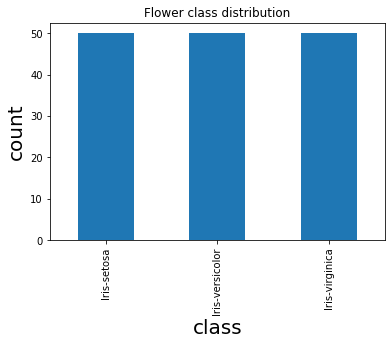

In [14]:
data_plot = data_iris['Species'].value_counts().plot.bar(title='Flower class distribution')
data_plot.set_xlabel('class', size=20)
data_plot.set_ylabel('count', size=20)

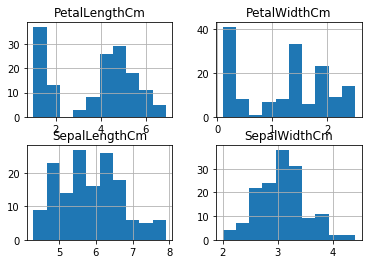

In [15]:
data_iris.hist()
plt.show()

## Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_iris['Species'] = encoder.fit_transform(data_iris['Species'])
data_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train and Test Split

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X =data_iris.drop(['Species'], axis=1)
Y =data_iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [18]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


## LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
log_model =  LogisticRegression()

In [20]:
log_model.fit(X_train, Y_train)
y_pred =log_model.predict(X_test)


In [21]:
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


In [22]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

accuracy is 0.8666666666666667


##  K Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
accuracy is 0.9
